In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

In [4]:
path = '/Users/katbishop/Desktop/DSI-SF2-bishopkd/projects/capstone/data/'

In [7]:
df = pd.read_csv(path + 'df.csv')

In [14]:
df.drop('Unnamed: 0',axis=1, inplace=True)
df.head(2)

,best_seller,body,sci_fi,title,avg_sent_len,word_count,avg_word_len,lex_diversity,polarity,subjectivity,...,verb_pp,verb_sing_pres,verb_3rd_sing_pres,wh_determ,wh_pronoun,wh_poss,wh_adv,poss_ending,symbol,list_marker
0,1,Prologue The sun is always just about to ris...,1,2312 - kim stanley robinson,14,166265,4,0.090717,0.076000,0.465868,...,3916.0,3230.0,1780.0,703.0,779.0,4.0,922.0,0.0,0.0,0.0
1,1,How to explain? How to describe? Even the omni...,1,a fire upon the deep - vernor vinge,11,207548,4,0.064477,0.067722,0.459148,...,5106.0,3117.0,2363.0,818.0,880.0,9.0,998.0,1809.0,1.0,0.0


In [15]:
df.columns

Index([u'best_seller', u'body', u'sci_fi', u'title', u'avg_sent_len',
       u'word_count', u'avg_word_len', u'lex_diversity', u'polarity',
       u'subjectivity', u'profanity', u'profane', u'conj_coord', u'number',
       u'determiner', u'exist_there', u'foreign_word', u'conj_sub_prep',
       u'adj', u'adj_compare', u'adj_sup', u'verb_aux', u'noun', u'noun_prop',
       u'noun_prop_pural', u'noun_plural', u'predeterm', u'pronoun_pers',
       u'pronoun_poss', u'adv', u'adv_compare', u'adv_sup', u'adv_part',
       u'inf_to', u'interject', u'verb_base', u'verb_past', u'verb_ger',
       u'verb_pp', u'verb_sing_pres', u'verb_3rd_sing_pres', u'wh_determ',
       u'wh_pronoun', u'wh_poss', u'wh_adv', u'poss_ending', u'symbol',
       u'list_marker'],
      dtype='object')

In [16]:
df.dtypes

best_seller             int64
body                   object
sci_fi                  int64
title                  object
avg_sent_len            int64
word_count              int64
avg_word_len            int64
lex_diversity         float64
polarity              float64
subjectivity          float64
profanity               int64
profane               float64
conj_coord            float64
number                float64
determiner            float64
exist_there           float64
foreign_word          float64
conj_sub_prep         float64
adj                   float64
adj_compare           float64
adj_sup               float64
verb_aux              float64
noun                  float64
noun_prop             float64
noun_prop_pural       float64
noun_plural           float64
predeterm             float64
pronoun_pers          float64
pronoun_poss          float64
adv                   float64
adv_compare           float64
adv_sup               float64
adv_part              float64
inf_to    

In [17]:
df.shape

(76, 48)

In [29]:
bs = df[df['best_seller']==1]
f = df[df['best_seller']==0]
sf = df[df['sci_fi']==1]
rm = df[df['sci_fi']==0]
sfbs = df[((df['best_seller']==1) & (df['sci_fi']==1))]
rmbs = df[((df['best_seller']==1) & (df['sci_fi']==0))]
sff = df[((df['best_seller']==0) & (df['sci_fi']==1))]
rmf = df[((df['best_seller']==0) & (df['sci_fi']==0))]

In [27]:
df[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr()

,best_seller,avg_sent_len,avg_word_len,lex_diversity,polarity,subjectivity,profane
best_seller,1.000000,0.110947,0.227508,-0.344143,-0.108030,-0.068653,-0.022724
avg_sent_len,0.110947,1.000000,0.182458,-0.137362,-0.094175,-0.050017,-0.278269
avg_word_len,0.227508,0.182458,1.000000,-0.119073,-0.096680,0.157929,-0.190113
lex_diversity,-0.344143,-0.137362,-0.119073,1.000000,0.220993,-0.174675,-0.015883
polarity,-0.108030,-0.094175,-0.096680,0.220993,1.000000,0.076116,-0.151811
subjectivity,-0.068653,-0.050017,0.157929,-0.174675,0.076116,1.000000,0.195066
profane,-0.022724,-0.278269,-0.190113,-0.015883,-0.151811,0.195066,1.000000


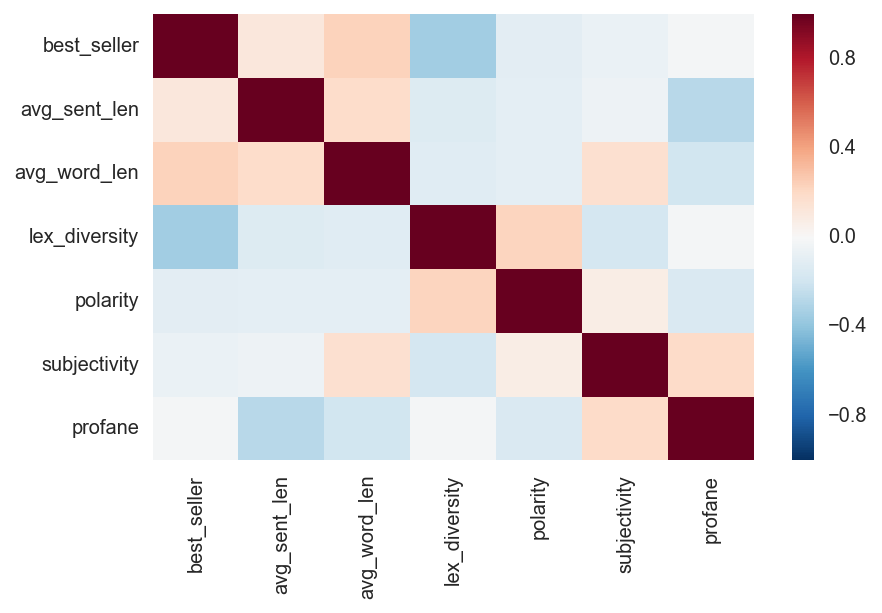

In [40]:
sns.heatmap(df[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr())

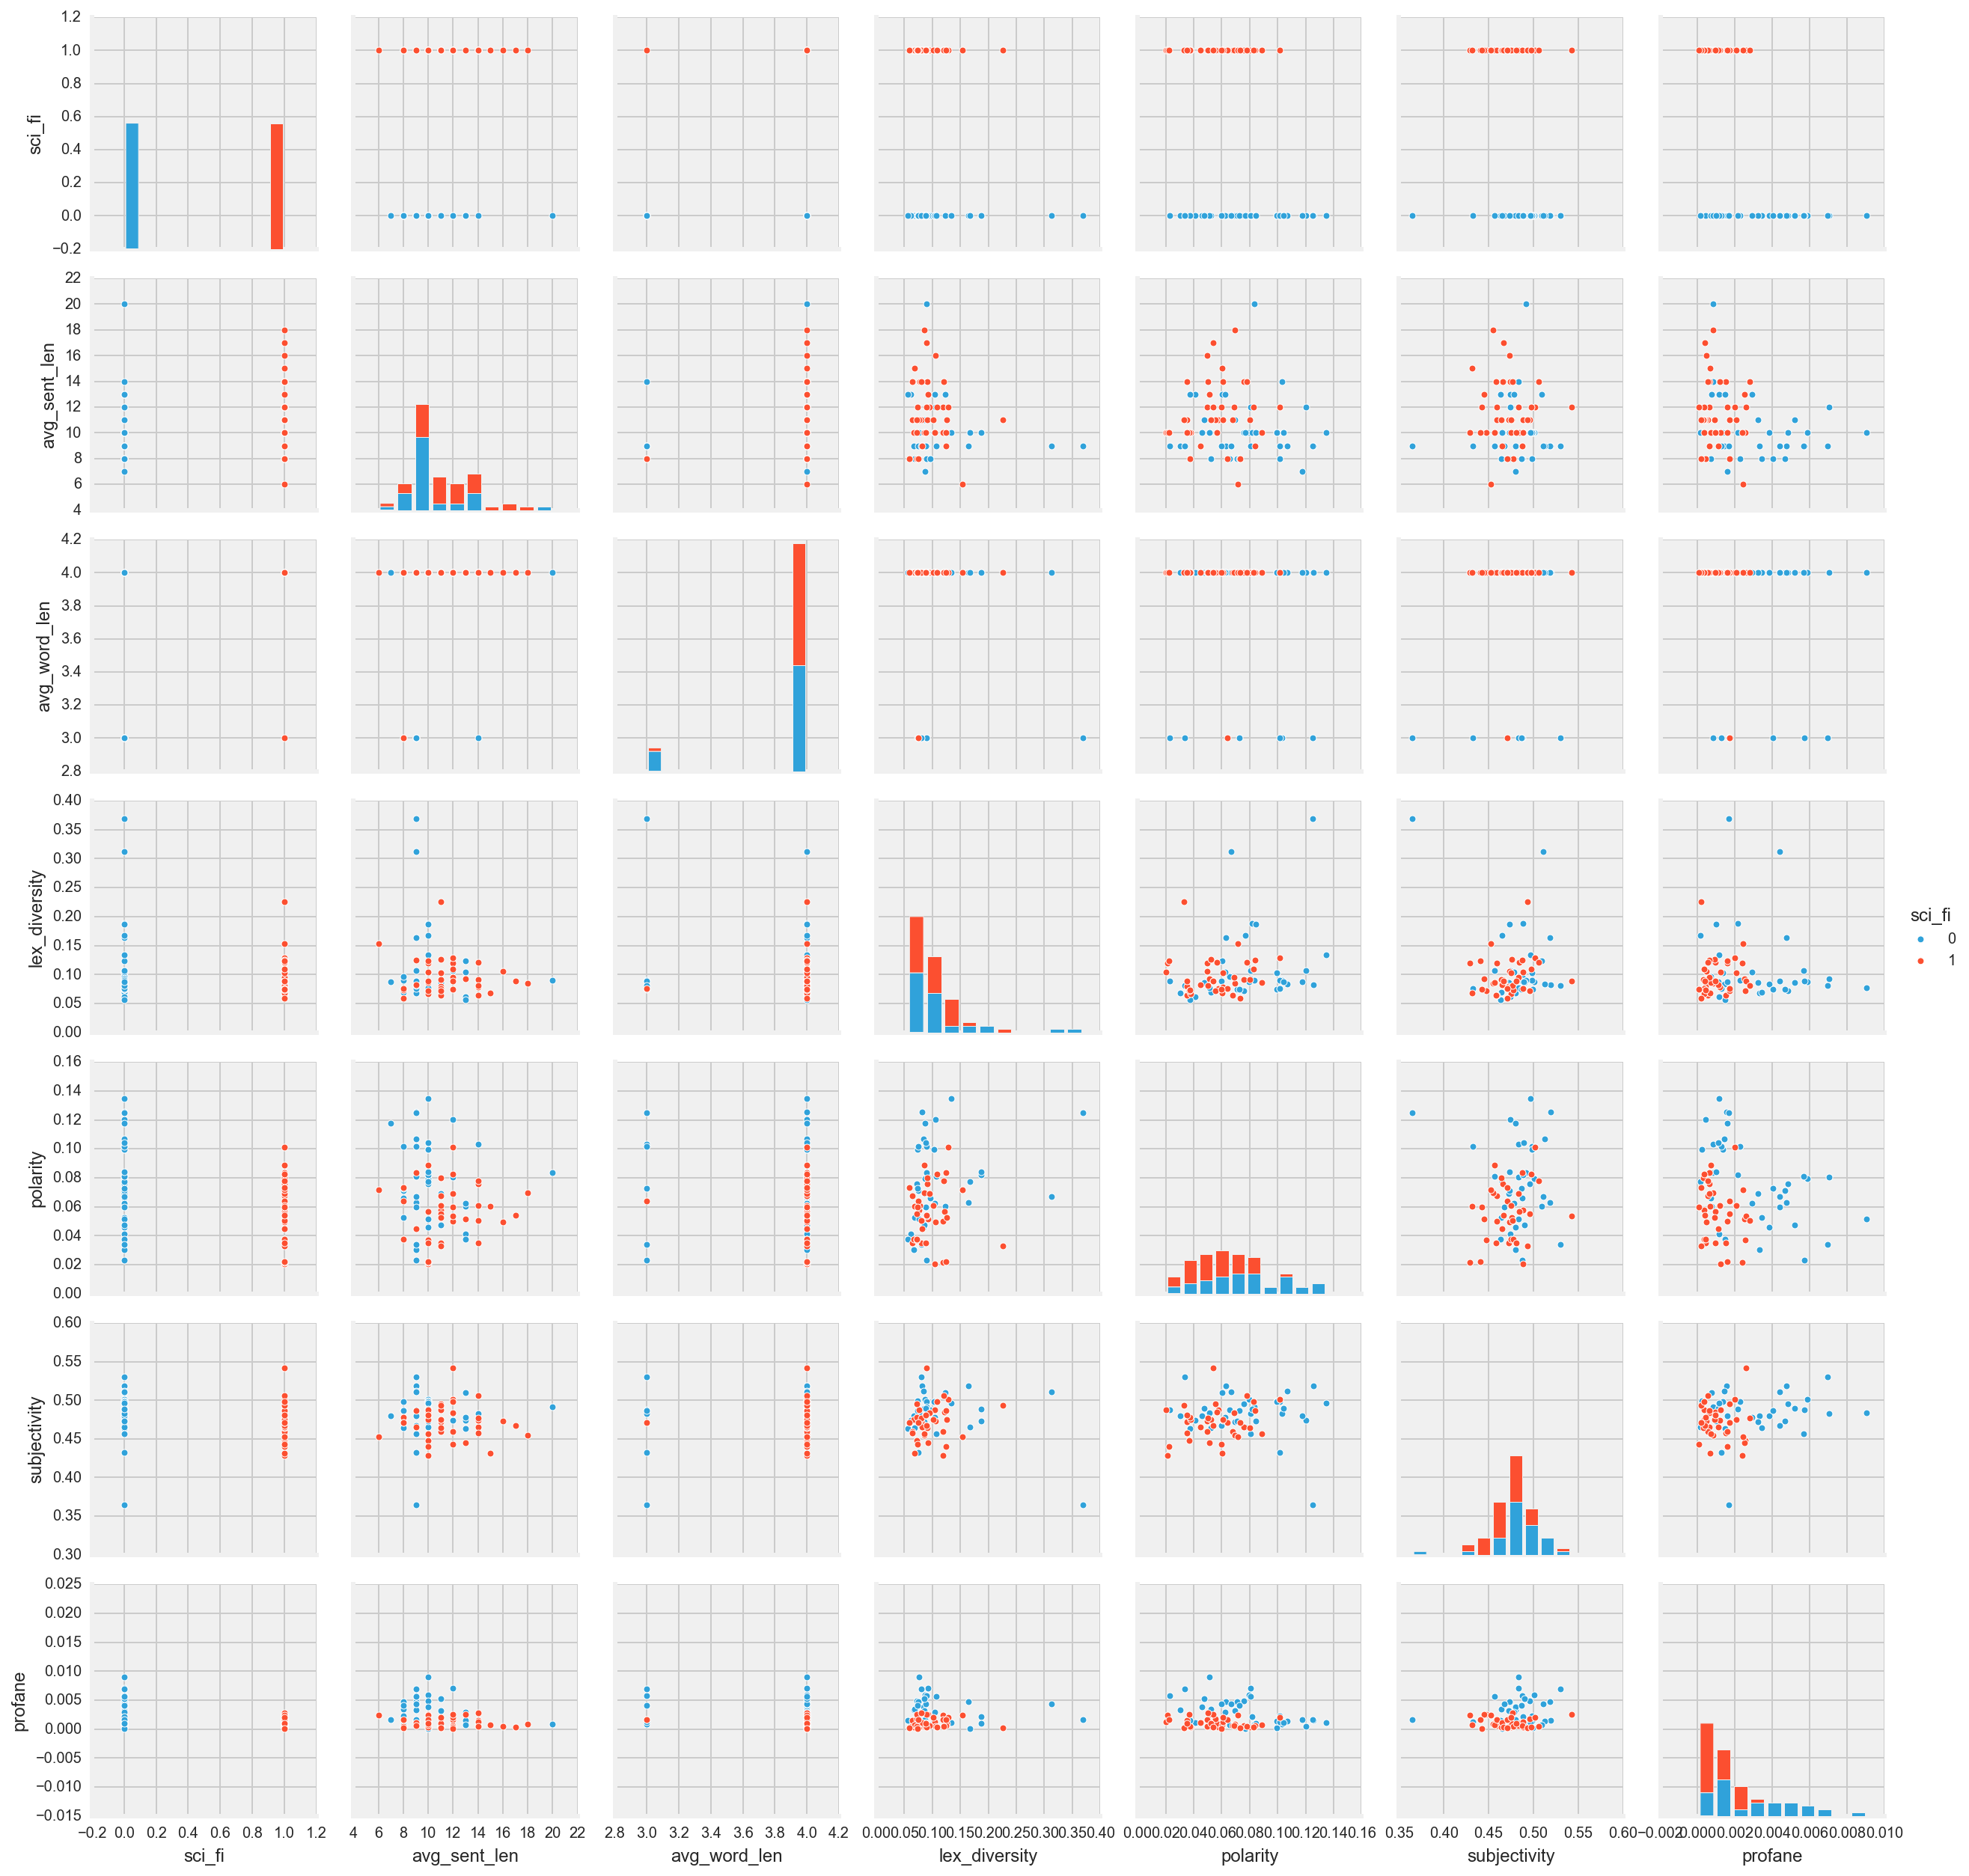

In [60]:
sns.pairplot(df[['sci_fi','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']],hue='sci_fi')

In [36]:
sf[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr()

,best_seller,avg_sent_len,avg_word_len,lex_diversity,polarity,subjectivity,profane
best_seller,1.000000,0.209936,0.173292,-0.336446,-0.192135,-0.358611,-0.019771
avg_sent_len,0.209936,1.000000,0.229196,-0.131223,0.104334,-0.027610,-0.116850
avg_word_len,0.173292,0.229196,1.000000,0.115775,-0.067527,0.008153,-0.118405
lex_diversity,-0.336446,-0.131223,0.115775,1.000000,-0.024980,0.187069,0.052754
polarity,-0.192135,0.104334,-0.067527,-0.024980,1.000000,0.223860,-0.186788
subjectivity,-0.358611,-0.027610,0.008153,0.187069,0.223860,1.000000,-0.059023
profane,-0.019771,-0.116850,-0.118405,0.052754,-0.186788,-0.059023,1.000000


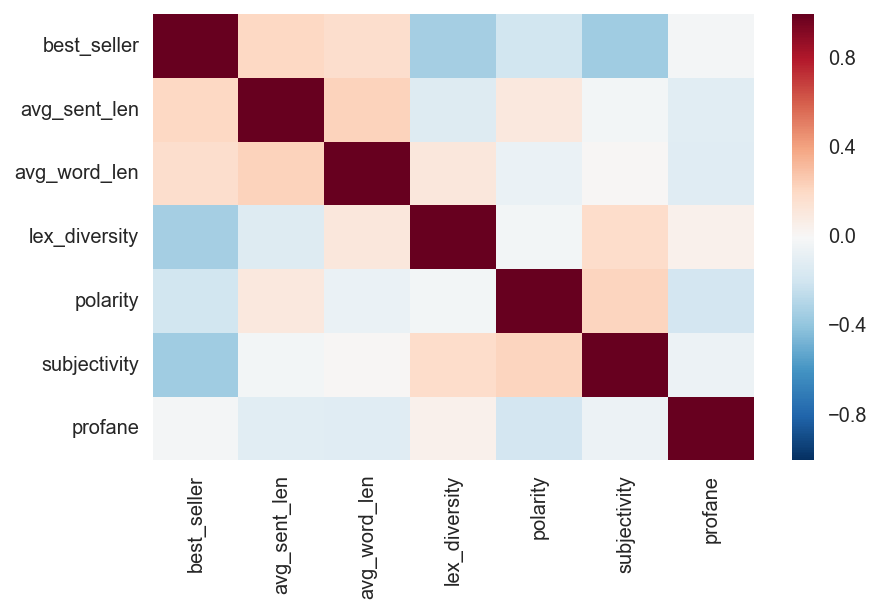

In [38]:
sns.heatmap(sf[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr())

In [37]:
rm[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr()

,best_seller,avg_sent_len,avg_word_len,lex_diversity,polarity,subjectivity,profane
best_seller,1.000000,-0.018123,0.266254,-0.372257,-0.032143,0.183337,0.011984
avg_sent_len,-0.018123,1.000000,0.102570,-0.109240,-0.059017,0.041212,-0.238654
avg_word_len,0.266254,0.102570,1.000000,-0.137504,0.011303,0.306577,-0.089993
lex_diversity,-0.372257,-0.109240,-0.137504,1.000000,0.258690,-0.374381,-0.116054
polarity,-0.032143,-0.059017,0.011303,0.258690,1.000000,-0.146386,-0.507220
subjectivity,0.183337,0.041212,0.306577,-0.374381,-0.146386,1.000000,0.154842
profane,0.011984,-0.238654,-0.089993,-0.116054,-0.507220,0.154842,1.000000


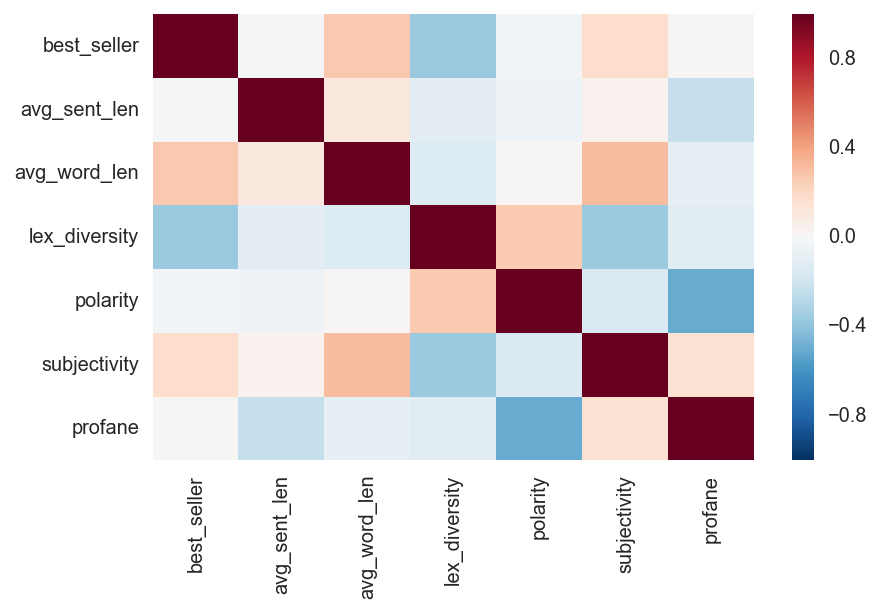

In [41]:
sns.heatmap(rm[['best_seller','avg_sent_len','avg_word_len','lex_diversity','polarity','subjectivity','profane']].corr())

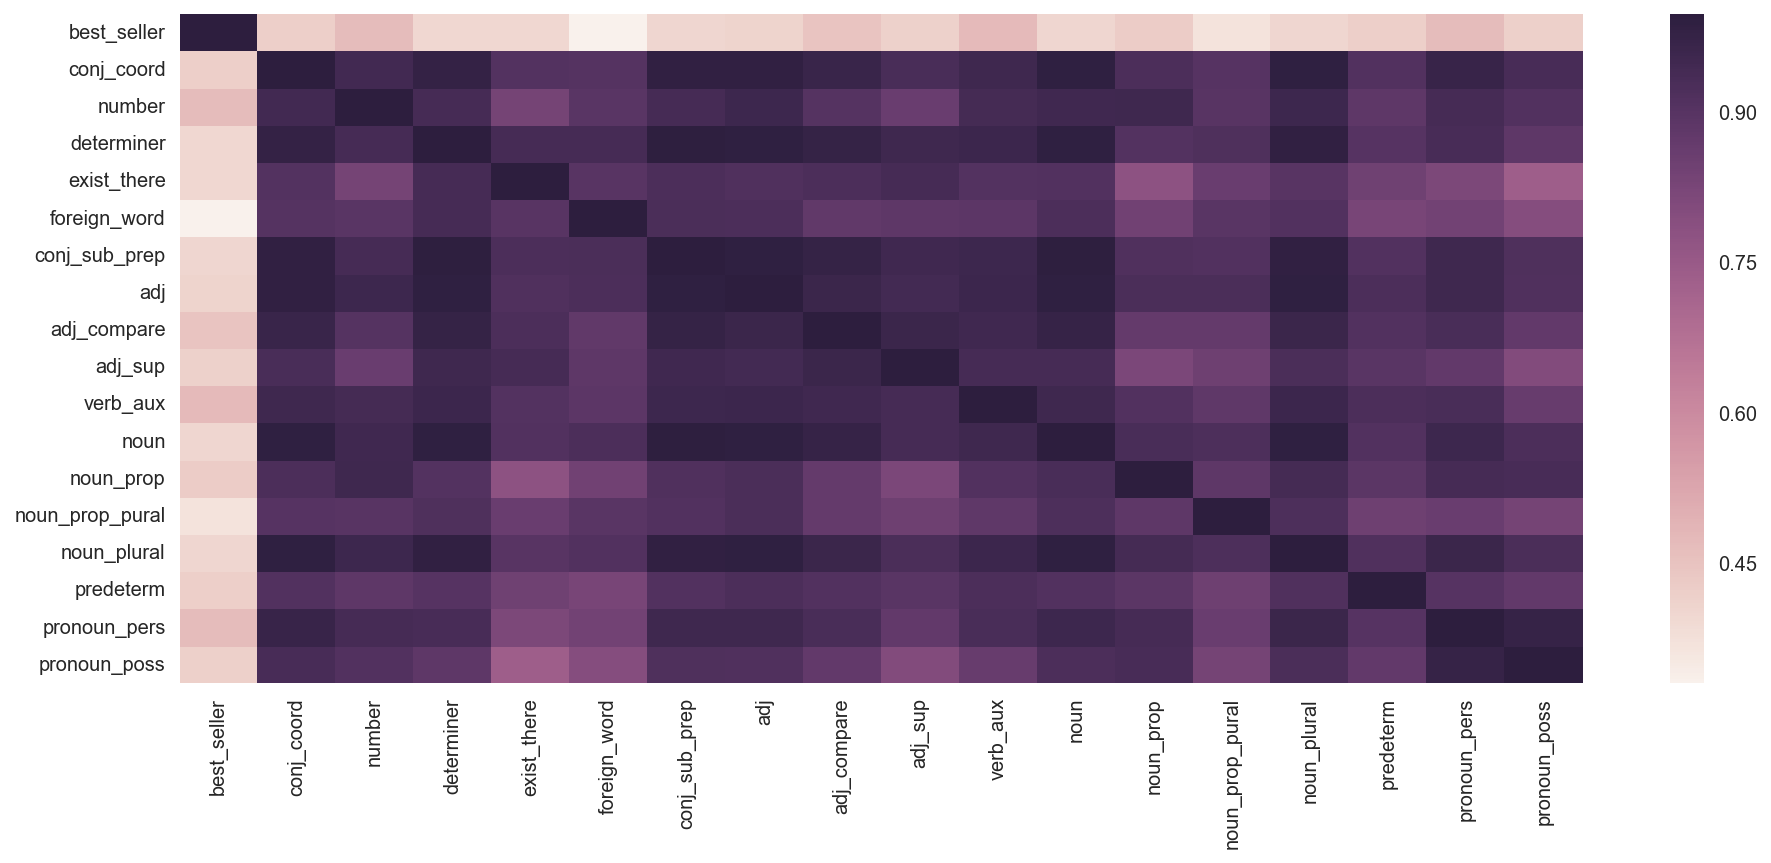

In [53]:
fig = plt.figure(figsize=(14,6))
ax = fig.gca()
sns.heatmap(rm[['best_seller','conj_coord', 'number','determiner', 'exist_there', 'foreign_word', 'conj_sub_prep',
                'adj', 'adj_compare', 'adj_sup', 'verb_aux', 'noun', 'noun_prop','noun_prop_pural', 'noun_plural', 
              'predeterm', 'pronoun_pers','pronoun_poss']].corr())
plt.show()

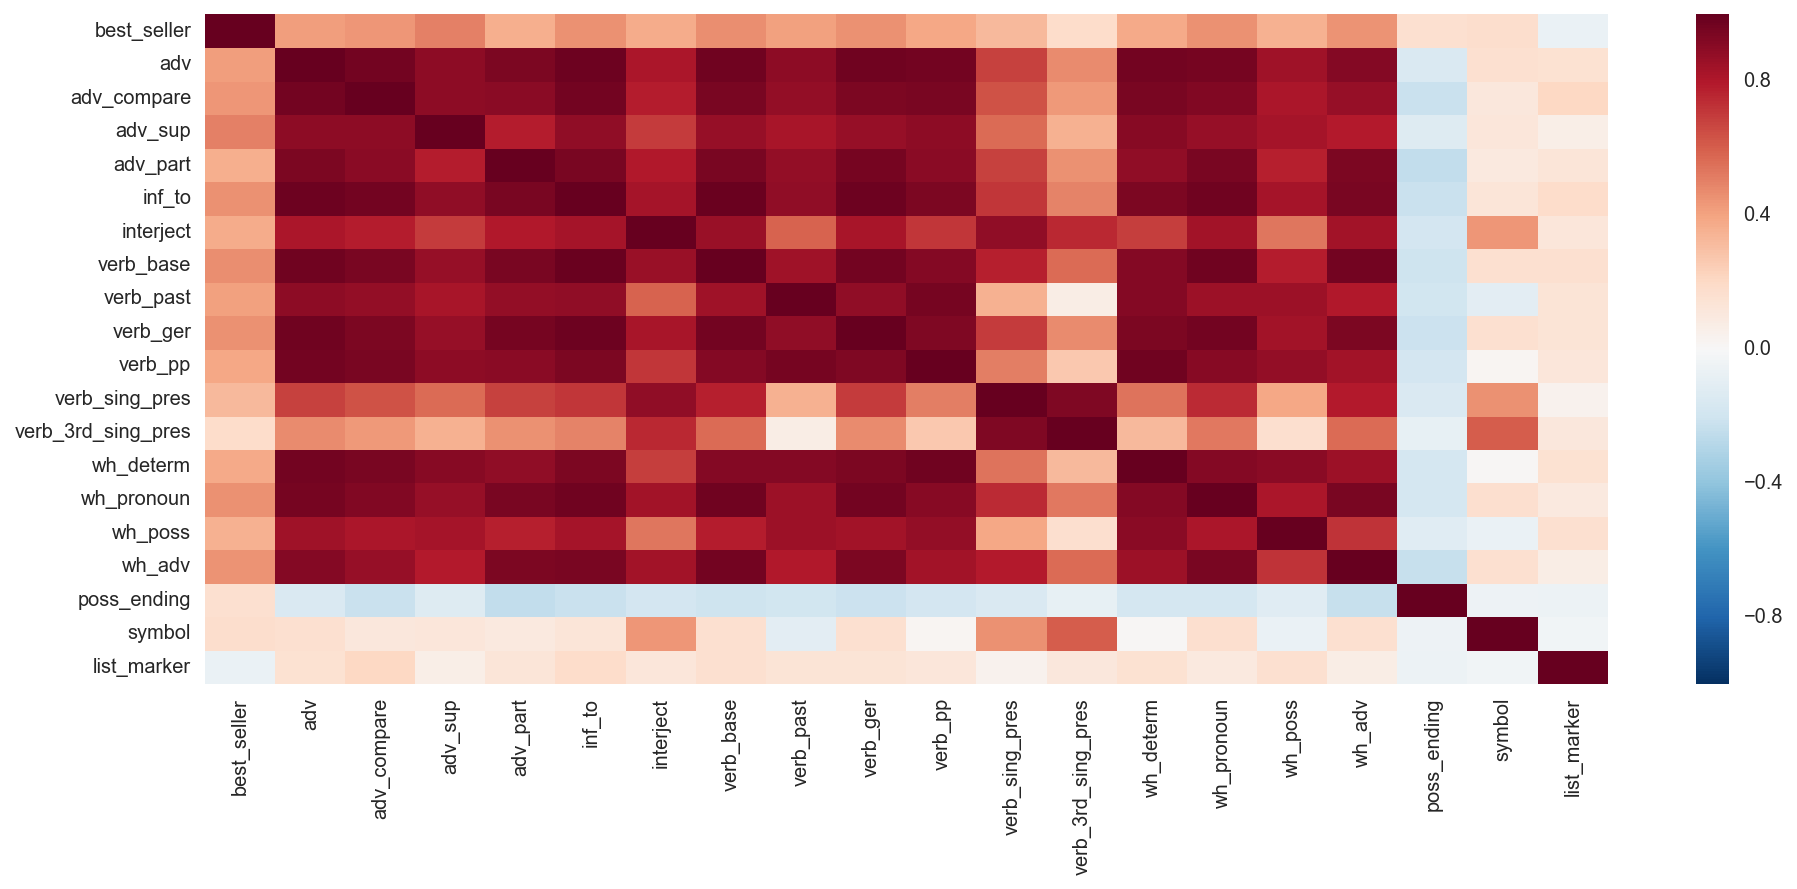

In [52]:
fig = plt.figure(figsize=(14,6))
ax = fig.gca()

sns.heatmap(rm[['best_seller','adv', 'adv_compare', 'adv_sup', 'adv_part','inf_to', 
              'interject', 'verb_base', 'verb_past', 'verb_ger','verb_pp', 'verb_sing_pres', 'verb_3rd_sing_pres', 
              'wh_determ','wh_pronoun', 'wh_poss', 'wh_adv', 'poss_ending', 'symbol','list_marker']].corr(),ax=ax)
plt.show()

In [21]:
predictors = ['avg_sent_len', 'avg_word_len', 'lex_diversity', 'polarity','subjectivity',  
              'profane', 'conj_coord', 'number','determiner', 'exist_there', 'foreign_word', 'conj_sub_prep',
                'adj', 'adj_compare', 'adj_sup', 'verb_aux', 'noun', 'noun_prop','noun_prop_pural', 'noun_plural', 
              'predeterm', 'pronoun_pers','pronoun_poss', 'adv', 'adv_compare', 'adv_sup', 'adv_part','inf_to', 
              'interject', 'verb_base', 'verb_past', 'verb_ger','verb_pp', 'verb_sing_pres', 'verb_3rd_sing_pres', 
              'wh_determ','wh_pronoun', 'wh_poss', 'wh_adv', 'poss_ending', 'symbol','list_marker']
y = df.best_seller.values
X = df[['avg_sent_len', 'avg_word_len', 'lex_diversity', 'polarity','subjectivity',  
              'profane', 'conj_coord', 'number','determiner', 'exist_there', 'foreign_word', 'conj_sub_prep',
                'adj', 'adj_compare', 'adj_sup', 'verb_aux', 'noun', 'noun_prop','noun_prop_pural', 'noun_plural', 
              'predeterm', 'pronoun_pers','pronoun_poss', 'adv', 'adv_compare', 'adv_sup', 'adv_part','inf_to', 
              'interject', 'verb_base', 'verb_past', 'verb_ger','verb_pp', 'verb_sing_pres', 'verb_3rd_sing_pres', 
              'wh_determ','wh_pronoun', 'wh_poss', 'wh_adv', 'poss_ending', 'symbol','list_marker']].values

linmod = LinearRegression()
linmod.fit(X,y)
print 'Intercept:', linmod.intercept_
print 'Coef(s):', linmod.coef_

Intercept: 0.40331930727
Coef(s): [ -1.20605984e-02   2.57311304e-01  -2.44770224e+00   4.67635553e+00
  -2.46660497e+00   5.75835663e+01  -1.38476467e-05   9.00027319e-04
  -1.39894277e-04  -6.29887280e-04  -1.53439526e-02   8.64704889e-05
  -1.65887576e-04  -2.14917322e-04  -2.24341165e-03   6.69243421e-06
   1.64083100e-04   1.17932770e-04   1.20209931e-04   1.54576382e-04
   2.04936312e-03   3.14756882e-04  -4.58592226e-04  -2.11028115e-05
  -1.77373201e-03   1.06904384e-02  -1.02921149e-03  -2.06930447e-04
   4.50456150e-04   3.72480094e-05  -1.22162642e-04   2.95309040e-04
  -3.85134016e-04  -4.65254944e-04  -1.03337652e-04   4.92102101e-04
   9.08551287e-05   7.25277107e-03  -5.77133727e-04   2.52881918e-04
   5.32583870e-03  -3.27857873e-01]


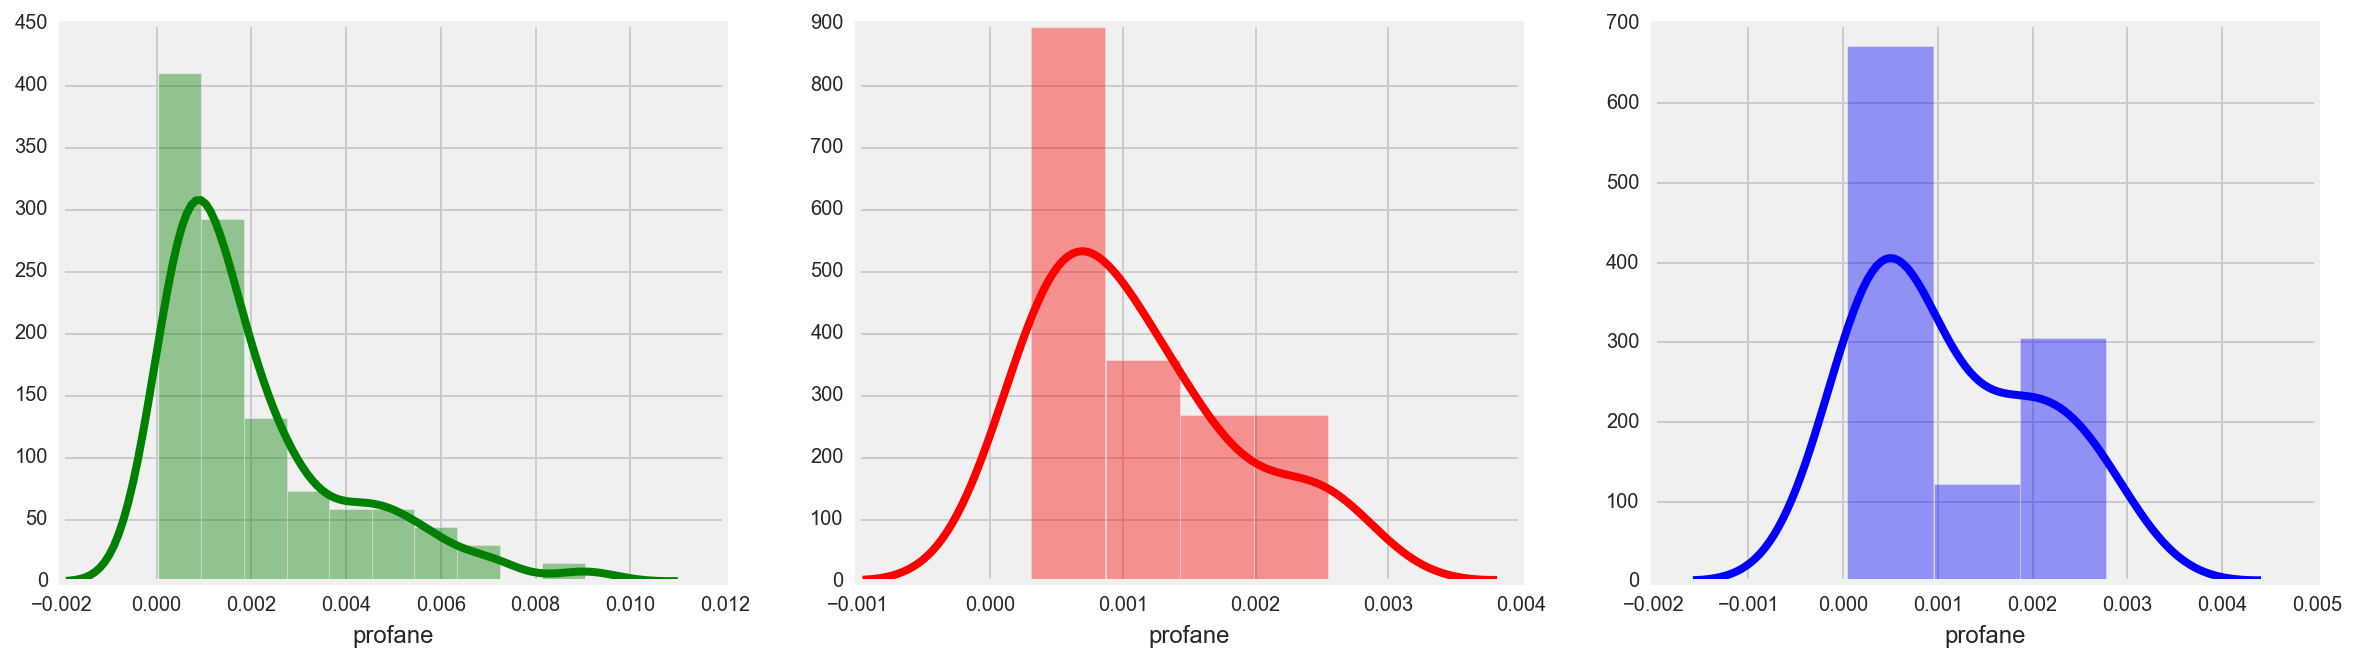

In [72]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0] =sns.distplot(df['profane'], color='g', ax=ax[0])
ax[1] =sns.distplot(sfbs['profane'], color='r', ax=ax[1])
ax[2] =sns.distplot(sff['profane'], color='b', ax=ax[2])
plt.show()


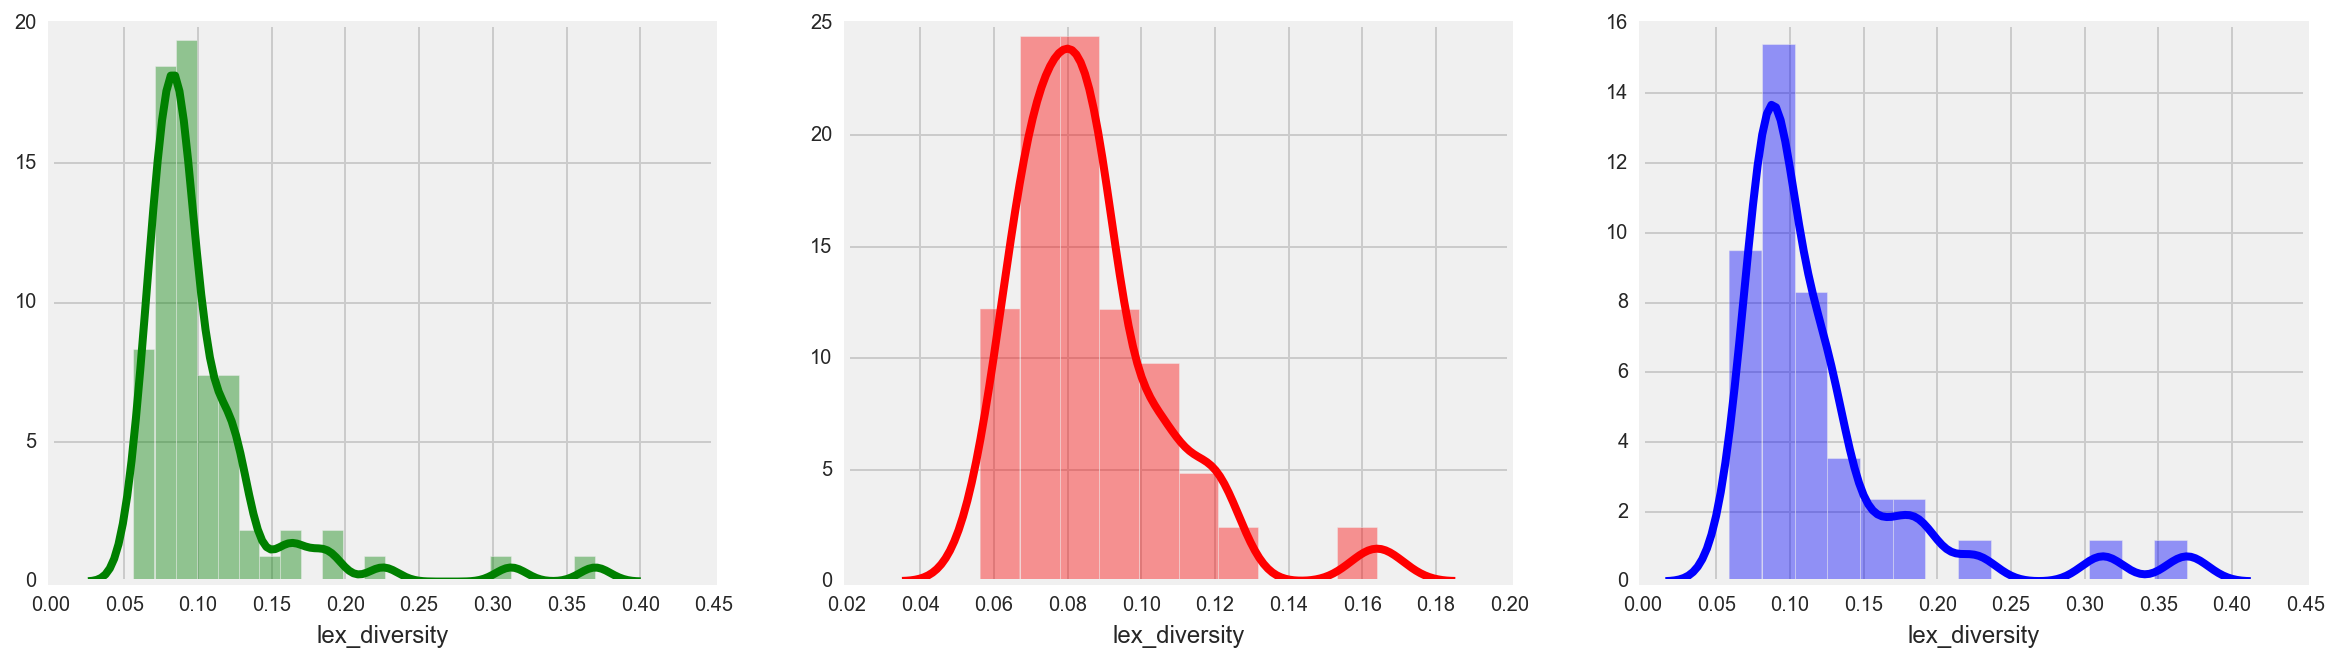

In [78]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0] =sns.distplot(df['lex_diversity'], color='g', ax=ax[0])
ax[1] =sns.distplot(bs['lex_diversity'], color='r', ax=ax[1])
ax[2] =sns.distplot(f['lex_diversity'], color='b', ax=ax[2])
plt.show()

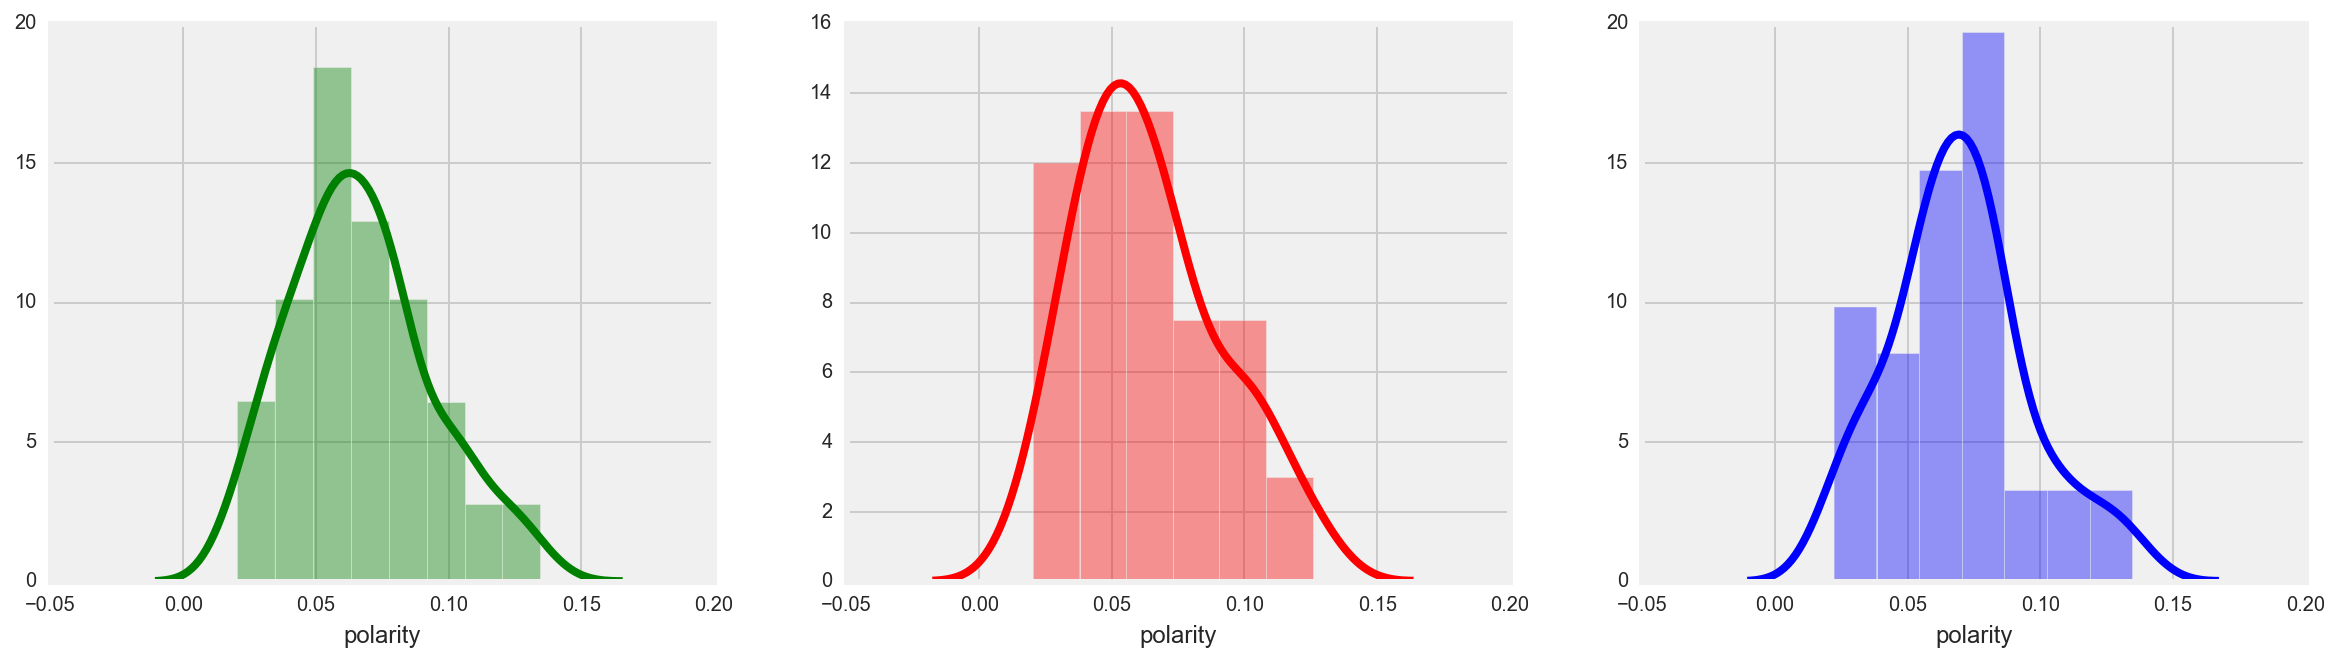

In [85]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0] =sns.distplot(df['polarity'], color='g', ax=ax[0])
ax[1] =sns.distplot(bs['polarity'], color='r', ax=ax[1])
ax[2] =sns.distplot(f['polarity'], color='b', ax=ax[2])
plt.show()

In [129]:
dd = {
    'best_seller':'Binary best-seller indicator',
    'body':'Book text',
    'sci_fi':'Binary indicator; Sci-Fi=1, Romance=0',
    'title':'Book title',
    'avg_sent_len':'Average sentence length',
    'word_count':'Total word count',
    'avg_word_len':'Average word length',
    'lex_diversity':'Lexical diversity: the number of unique words over the total word count',
    'polarity':'Polarity: measure of negativity to positivity scaled -1.0-1.0',
    'subjectivity':'Subjectivity: measure of objectivity to subjectivity scaled 0.0-1.0',
    'profanity':'Number of profane words',
    'profane':'Profanity measure: number of profane words over the total word count',
    'conj_coord':'POS - coordinating conjunction; and, or, but',
    'number':'POS - cardinal number; five, three, 13%',
    'determiner':'POS - determiner; the, a, these',
    'exist_there':'POS - existential there; there were six boys',
    'foreign_word':'POS - foreign word',
    'conj_sub_prep':'POS - subordinating conjunction or preposition; of, on, before, unless',
    'adj':'POS - adjective',
    'adj_compare':'POS - adjective, comparative',
    'adj_sup':'POS - adjective, superlative',
    'verb_aux':'POS - verb, modal auxillary; may, should',
    'noun':'POS - noun',
    'noun_prop':'POS - noun, proper',
    'noun_prop_pural':'POS - noun, proper plural',
    'noun_plural':'POS - noun, plural',
    'predeterm':'POS - predeterminer; both his children',
    'pronoun_pers':'POS - personal pronoun; me, you, it',
    'pronoun_poss':'POS - possessive pronoun; my, your, our',
    'adv':'POS - adverb; extremely, loudly, hard',
    'adv_compare':'POS - adverb, comparative; better',
    'adv_sup':'POS - adverb, superlative; best',
    'adv_part':'POS - adverb, particle; about, off, up',
    'inf_to':'POS - infinitival to; what to do?',
    'interject':'POS - interjection; oh, oops, gosh',
    'verb_base':'POS - verb, base form; think',
    'verb_past':'POS - verb, past tense; they thought',
    'verb_ger':'POS - verb, gerund or present participle; thinking is fun',
    'verb_pp':'POS - verb, past participle; a sunken ship',
    'verb_sing_pres':'POS - verb, non-3rd person singular present; I think',
    'verb_3rd_sing_pres':'POS - verb, 3rd person singular present; she thinks',
    'wh_determ':'POS - wh-determiner; which, whatever, whichever',
    'wh_pronoun':'POS - wh-pronoun, personal; what, who, whom',
    'wh_poss':'POS - wh-pronoun, possessive; whose, whosever',
    'wh_adv':'POS - wh-adverb; where, when',
    'poss_ending':'POS - possessive ending; s',
    'symbol':'POS - symbol; %$#',
    'list_marker':'POS - list item marker'
    }

In [130]:
pos_df = pd.DataFrame(dd, index=[0]).reset_index()
del pos_df['index']
pos = pos_df.T
pos.columns = ['description']
pos['datatype'] = 'float'
pos.ix['body',1] = 'object'
pos.ix['title',1] = 'object'
pos.ix['profanity',1] = 'integer'
pos.ix['best_seller',1] = 'integer'
pos.ix['sci_fi',1] = 'integer'
pos.ix['word_count',1] = 'integer'

In [132]:
pos.sort_values(['datatype','description'], ascending=[0,1])

,description,datatype
body,Book text,object
title,Book title,object
best_seller,Binary best-seller indicator,integer
sci_fi,"Binary indicator; Sci-Fi=1, Romance=0",integer
profanity,Number of profane words,integer
word_count,Total word count,integer
avg_sent_len,Average sentence length,float
avg_word_len,Average word length,float
lex_diversity,Lexical diversity: the number of unique words ...,float
adj,POS - adjective,float
